
# Project: Data investigation and analysis of TMDb dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This report is specific to the analysis of TMDB movie dataset. There are few questions that can be raised to help streamline the analysis on this dataset.


<ol>
<li> How is budget associated with revenues? </li>
<li> What are the characteristics of a production company leading higher revenues ? </li> 
<li> Does Higher popularity increases vote counts, thereby increasing the revenue of the film? </li>
<li> Does Seasonal releases impact the revenue generation of a movie? </li>   
<li> What factors are associated with the failure of a film? </li> 
<li> What genres are most accepted? </li>  
<li> Which film was the most successful and which performed the worst in the 21st century? (2000-2015). </li>          
</ol>

In [1]:
# importing and reading csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df=pd.read_csv('tmdb-movies.csv')
df.head(2)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


<a id='wrangling'></a>
## Data Wrangling
### a. Assessing the data



In [2]:
#assessing the data types,number of columns having null values along with the dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [3]:
print('No of rows having zero value for the budget and revenue column',sum((df['budget']==0) | (df['revenue']==0))) #looking out if budget columns has any zero values so that it can be neglected
print('The total number of dupe rows are',sum(df.duplicated())) # checking for sum of duplicated rows

No of rows having zero value for the budget and revenue column 7011
The total number of dupe rows are 1


### *Observations*
<ul>
<li> <p>The data has about 10866 rows and 21 columns, out of which 5 columns has null values namely 'production_companies','keywords','homepage','tagline' and 'cast'.</p></li>
<li> <p>There is one duplicated row and can be removed from the date.</p></li> 
<li> <p>The Revenue and budget column combined has about 7011 rows of zero values and can be considered as missing values because having any one of those column as zero wont give an insightful analysis and zero values for these columns are un-realistic.</p></li>    
<li><p> Columns such as id,imdb_id,homepage,tagline and overview are not needed for the analysis and hence can be removed</p></li>

### *b.Cleaning the data*

In [4]:
#dropping out the columns
df.drop(['id','imdb_id','homepage','tagline','overview','keywords'],axis=1,inplace=True)
print(df.columns)

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


In [5]:
# Filtering out the budget and revenue rows having zero values
df.drop(df[df['budget']==0].index,inplace=True)
df.drop(df[df['revenue']==0].index,inplace=True)
print(sum(df['budget']==0))
print(sum(df['revenue']==0))

0
0


In [6]:
#removing the Null values
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [7]:
#checking the final dimensions
print(df.shape) 

(3806, 15)


In [8]:
# changing the date format columns
df['release_date']=pd.to_datetime(df['release_date'][:])
df['release_date'].dtype

dtype('<M8[ns]')

In [9]:
#normalizing the budget_adj and revenue_adj to have the values on a common scale in ( million)
df['budget_adj']=df['budget_adj']/1000000
df['revenue_adj']=df['revenue_adj']/1000000
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445893
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137.999939,348.161292
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101.199955,271.619025
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183.999919,1902.723130
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174.799923,1385.748801


In [10]:
# rounding upto the nearest digit
df['budget_adj']=df['budget_adj'].apply(np.ceil)
df['revenue_adj']=df['revenue_adj'].apply(np.ceil)
df.head()


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,138.0,1393.0
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,138.0,349.0
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,102.0,272.0
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,184.0,1903.0
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,175.0,1386.0


### <b>Inferences</b>
<ol>
<li> The columns 'id','imdb_id','homepage','tagline','overview','keywords' were removed as it wasn't needed for this analysis.</li>
<li> Filtered out the budget and revenue rows having zero values which was un-realistic.</li>
<li> Removed the Null values rows. </li>
<li> Changed the 'release_date' column to date format to use for suitable analysis. </li>
<li> Normalized the 'revenue_adj' and 'budget_adj' columns to a common scale of million to make more uniform analysis. </li>  
<li> The 'Budget_adj' and 'revenue_adj' are rounded off to the closest upper limit as accuracy upto decimal values would not be needed in this insight. </p>     
    
    

<a id='eda'></a>
## Exploratory Data Analysis

###  1.How is budget associated with revenue?

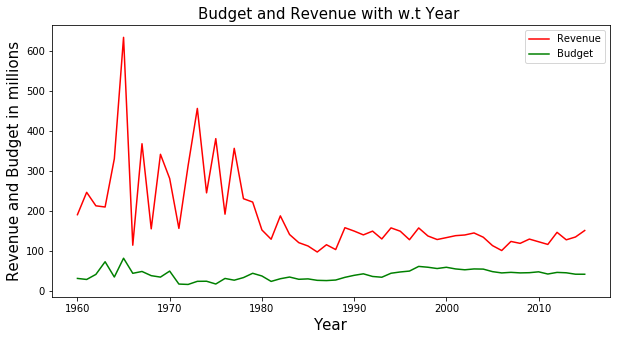

In [11]:
df_year_rev=df.groupby('release_year').mean()[['revenue_adj','budget_adj']].reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_year_rev.release_year,df_year_rev.revenue_adj,color='r',label='Revenue')
plt.plot(df_year_rev.release_year,df_year_rev.budget_adj,color='g',label='Budget')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Revenue and Budget in millions',fontsize=15)
plt.title('Budget and Revenue with w.t Year ',fontsize=15)
plt.legend()

<p><b> The above plots visualizes the average Revenue and Budget along the years showing the marging between the these two parameters with Revenue having the upper band</p> 

Text(0.5,1,'Budget vs Revenue')

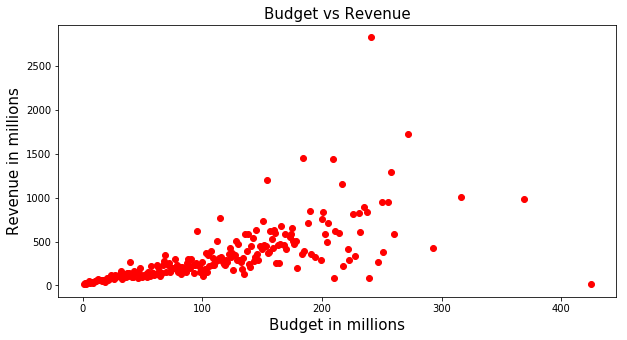

In [12]:
df_rev=df.groupby('budget_adj').mean()['revenue_adj'].reset_index()

plt.figure(figsize=(10,5))
plt.scatter(df_rev.budget_adj,df_rev.revenue_adj,color='r')
plt.xlabel('Budget in millions',fontsize=15)
plt.ylabel('Revenue in millions',fontsize=15)
plt.title('Budget vs Revenue',fontsize=15)

<p><b> The above gives an idea of linear relationship between Revenue and Budget barring couple of outliers.</b> </p> 

In [13]:
#having a look at the statistics
df_rev.describe(())

,budget_adj,revenue_adj
count,215.00000,215.000000
mean,115.20000,341.827950
std,75.77754,331.526268
min,1.00000,12.000000
50%,108.00000,252.473684
max,425.00000,2828.000000


In [14]:
#determining the difference in the ratio between Revenue and Budget pre and post the year 1985
df_rev_60=df[df['release_year']<1985]
df_rev_85=df[df['release_year']>=1985]
r_60=df_rev_60['revenue_adj']/df_rev_60['budget_adj']
r_85=df_rev_85['revenue_adj']/df_rev_85['budget_adj']
print(r_60.mean())
print(r_85.mean())

12.16997311441375
3.465003388221613


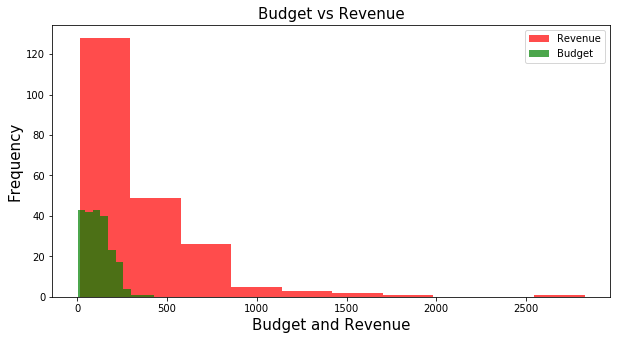

In [15]:
#distribution plots of Budget and Revenue
plt.figure(figsize=(10,5))
plt.hist(df_rev.revenue_adj,color='r',alpha=0.7,label='Revenue')
plt.hist(df_rev.budget_adj,color='g',alpha=0.7,label='Budget')
plt.xlabel('Budget and Revenue',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Budget vs Revenue',fontsize=15)
plt.legend()

<p><b> The above plot visualises the right skewness of the Revenue and Budget parameters with Revenue having a larger spread.</b> </p>

### 2. What are the characteristics of a production company leading to higher revenue ?

In [62]:
prod_rev=df.groupby(['production_companies','cast','genres','runtime']).mean()[['revenue_adj']].reset_index()

In [63]:
prod_rev=prod_rev.sort_values(by=['revenue_adj'],ascending=False)

In [64]:
prod_rev.head(10)

,production_companies,cast,genres,runtime,revenue_adj
1311,Ingenious Film Partners|Twentieth Century Fox ...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Action|Adventure|Fantasy|Science Fiction,162,2828.0
1555,Lucasfilm|Twentieth Century Fox Film Corporation,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Adventure|Action|Science Fiction,121,2790.0
2264,Paramount Pictures|Twentieth Century Fox Film ...,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,Drama|Romance|Thriller,194,2507.0
3717,Warner Bros.|Hoya Productions,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,Drama|Horror|Thriller,122,2168.0
3403,Universal Pictures|Zanuck/Brown Productions,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Horror|Thriller|Adventure,124,1908.0
1552,Lucasfilm|Truenorth Productions|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,136,1903.0
3187,Universal Pictures|Amblin Entertainment,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Science Fiction|Adventure|Family|Fantasy,115,1792.0
427,Columbia Pictures,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Crime|Drama|Mystery|Thriller|Action,114,1584.0
3636,Walt Disney Productions,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Adventure|Animation|Comedy|Family,79,1575.0
1586,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Science Fiction|Action|Adventure,143,1444.0


### 3. Does Higher popularity increase vote counts, thereby having an effect on revenue of the film?

In [65]:
#sorting the data set by descending order of Popularity
df_pop=df.sort_values(by=['popularity'],ascending=False)

In [20]:
#first 5 row 
df_pop.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,138.0,1393.0
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,138.0,349.0
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,152.0,573.0
630,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,157.0,713.0
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,102.0,272.0


Text(0.5,1,'Revenue vs Vote average')

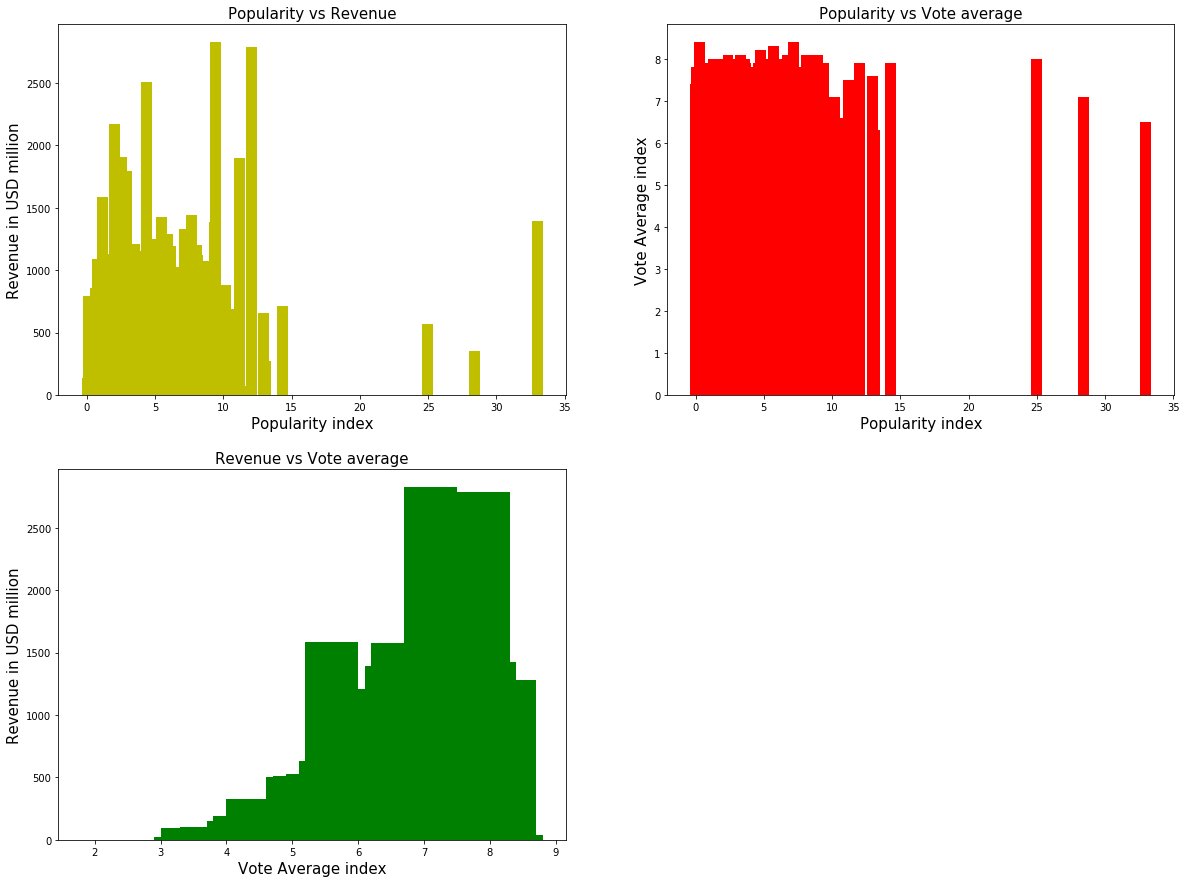

In [21]:
# visualizing the effect of Popularity, Votecount on Revenue
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.bar(df_pop['popularity'],df_pop['revenue_adj'],color='y',alpha=1,label='Revenue')
plt.xlabel('Popularity index',fontsize=15)
plt.ylabel('Revenue in USD million',fontsize=15)
plt.title('Popularity vs Revenue',fontsize=15)

plt.subplot(222)
plt.bar(df_pop['popularity'],df_pop['vote_average'],color='r',alpha=1)
plt.xlabel('Popularity index',fontsize=15)
plt.ylabel('Vote Average index',fontsize=15)
plt.title('Popularity vs Vote average',fontsize=15)

plt.subplot(223)
plt.bar(df_pop['vote_average'],df_pop['revenue_adj'],color='g',alpha=1)
plt.xlabel('Vote Average index',fontsize=15)
plt.ylabel('Revenue in USD million',fontsize=15)
plt.title('Revenue vs Vote average',fontsize=15)

<p> <b> This bar plot (1st row) inspects of how the Avg vote would relate to the Popularity index, in which the latter having higher values for lower values of Votes.
And with the Vote vs Revenue, the 2nd row plot gives us an idea that higher the votes ,the higher was the revenuw</b></p>

In [22]:
#from a stat view 
df_pop.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000
mean,1.203625,3.760600e+07,1.089450e+08,109.346558,534.047556,6.170257,2001.231477,45.203100,139.196532
std,1.480407,4.231641e+07,1.772829e+08,19.845063,883.668197,0.792560,11.329019,44.866061,216.969894
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.000000,1.000000
25%,0.470673,1.000000e+07,1.429262e+07,96.000000,74.000000,5.700000,1995.000000,14.000000,20.000000
50%,0.810226,2.500000e+07,4.620904e+07,106.000000,208.500000,6.200000,2004.000000,31.000000,63.000000
75%,1.387058,5.000000e+07,1.260625e+08,119.000000,584.000000,6.700000,2010.000000,61.000000,166.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,425.000000,2828.000000


### 4. Does Seasonal releases impact the revenue generation of a movie?

In [23]:
# adding month column to give an idea of seasons
df['month']=df['release_date'].dt.month
df['month']=pd.cut(df['month'],12,labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [24]:
#first 5 rows
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,138.0,1393.0,Jun
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,138.0,349.0,May
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,102.0,272.0,Mar
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,184.0,1903.0,Dec
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,175.0,1386.0,Apr


In [25]:
#grouping by months to give an idea wrt count and mean of revenue trend
df_mon_r=df.groupby('month').count().reset_index()
df_mon_rev=df.groupby('month').mean().reset_index()


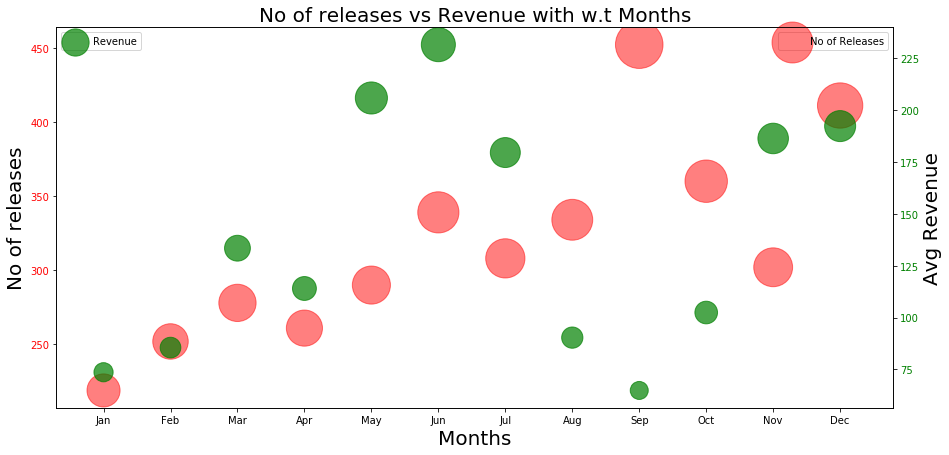

In [70]:
#plotting the data to visualize the Revenue and no of releases made for each month
x1=np.arange(len(df_mon_r['month']))
labels1=df_mon_r['month']
width1=0.30
fig1,ax2=plt.subplots(figsize=(15,7))
ax3 = ax2.twinx()

ax2.scatter(labels,df_mon_r['release_date'],color='r',alpha=0.5,s=df_mon_r['release_date']*5,label='No of Releases')
ax3.scatter(labels,df_mon_rev['revenue_adj'],color='g',label='Revenue',alpha=0.7,s=df_mon_rev['revenue_adj']*5)
ax2.set_ylabel('No of releases',fontdict={'size':20})
ax2.set_xlabel('Months',fontdict={'size':20})
ax2.set_title('No of releases vs Revenue with w.t Months',fontdict={'size':20})
ax2.set_xticks(x1)
ax2.set_xticklabels(labels1)
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

ax3.set_ylabel('Avg Revenue',fontdict={'size':20})  
ax3.tick_params(axis='y', labelcolor='g')
ax3.legend(loc='upper left')

<p> <b> This bubble plot inspects of how the the number of releases have been contradictory with the average revenue for month between May - June and Aug - October.</b></p>

In [243]:
# stats for months between May to July
df_mon_rev[5:8].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.000000,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.286590,4.239611e+07,1.303904e+08,107.517527,590.303685,6.091413,1999.844497,51.734023,167.183924
std,0.249092,1.093642e+07,5.441340e+07,2.927865,195.683635,0.093384,1.742441,14.470237,71.465240
min,1.003299,3.017547e+07,7.121856e+07,104.583832,365.730539,5.988922,1998.221239,35.967066,90.326347
25%,1.194223,3.796278e+07,1.064482e+08,106.056527,523.352282,6.051279,1998.923931,45.397494,134.960252
50%,1.385146,4.575009e+07,1.416779e+08,107.529221,680.974026,6.113636,1999.626623,54.827922,179.594156
75%,1.428235,4.850643e+07,1.599764e+08,108.984374,702.590258,6.142659,2000.656126,59.617501,205.612712
max,1.471323,5.126276e+07,1.782749e+08,110.439528,724.206490,6.171681,2001.685629,64.407080,231.631268


In [244]:
# stats for months between August to October
df_mon_rev[8:11].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3.000000,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.195800,3.404188e+07,9.339199e+07,109.954670,497.324103,6.254154,2002.059116,40.895395,117.884752
std,0.249217,1.169005e+07,4.840665e+07,2.168672,120.552678,0.011877,1.959474,14.395556,62.231774
min,0.945997,2.397358e+07,5.386301e+07,108.619444,375.455752,6.244912,2000.771523,28.258850,64.836283
25%,1.071486,2.763156e+07,6.639762e+07,108.703528,437.727876,6.247456,2000.931595,33.059980,83.633419
50%,1.196975,3.128955e+07,7.893223e+07,108.787611,500.000000,6.250000,2001.091667,37.861111,102.430556
75%,1.320701,3.907603e+07,1.131565e+08,110.622282,558.258278,6.258775,2002.702913,47.213668,144.408986
max,1.444427,4.686250e+07,1.473807e+08,112.456954,616.516556,6.267550,2004.314159,56.566225,186.387417


### 5.What factors are associated with the failure of a film?

In [245]:
#filtering out the values of the dataset falling below the median
med=df['revenue_adj'].median()
med_l=df[df['revenue_adj'] <= med]


In [246]:
#filtering out the values of the dataset falling above the median
med_h=df[df['revenue_adj'] > med]


In [247]:
#bringing out the stats
med_l.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1904.000000,1.904000e+03,1.904000e+03,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000
mean,0.695084,1.934231e+07,1.854594e+07,105.101366,190.621324,6.014758,2002.403887,23.838761,23.110819
std,0.592176,2.079495e+07,1.632799e+07,17.486237,309.572777,0.811658,10.294365,24.065634,18.384885
min,0.015727,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.000000,1.000000
25%,0.345922,6.000000e+06,4.622433e+06,94.000000,39.000000,5.500000,1996.000000,8.000000,6.000000
50%,0.549578,1.442527e+07,1.463441e+07,102.000000,90.000000,6.100000,2005.000000,17.000000,20.000000
75%,0.859552,2.500000e+07,2.900000e+07,113.000000,213.000000,6.600000,2010.000000,33.000000,37.000000
max,7.192039,4.250000e+08,6.780006e+07,338.000000,5754.000000,8.400000,2015.000000,425.000000,63.000000


In [249]:
# determining the mean and std deviation
med_h.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1902.000000,1.902000e+03,1.902000e+03,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000,1902.000000
mean,1.712700,5.588889e+07,1.994391e+08,113.596215,877.834911,6.325920,2000.057834,66.589905,255.404311
std,1.875450,4.982739e+07,2.150879e+08,21.120255,1109.349141,0.741181,12.167809,50.344297,258.610307
min,0.010335,1.130000e+02,9.440272e+06,69.000000,10.000000,3.400000,1960.000000,1.000000,64.000000
25%,0.774296,2.000000e+07,7.617676e+07,98.000000,205.000000,5.800000,1994.000000,29.000000,98.000000
50%,1.212886,4.000000e+07,1.261432e+08,110.000000,474.500000,6.300000,2003.000000,53.000000,166.000000
75%,1.998480,7.500000e+07,2.346914e+08,125.000000,1077.000000,6.900000,2009.000000,92.000000,308.750000
max,32.985763,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.300000,2015.000000,369.000000,2828.000000


### 6. What genres are most accepted?

In [250]:
# checking out the top 5 value counts for genres
df['genres'].value_counts().head()

Drama                   243
Comedy                  230
Drama|Romance           106
Comedy|Romance          103
Comedy|Drama|Romance     87
Name: genres, dtype: int64

In [251]:
# Grouping genres in terms of descending Revenues
df_gen=df.groupby('genres').mean()[['revenue_adj','vote_average']].reset_index()
df_gen_s=df_gen.sort_values(by=['revenue_adj','vote_average'],ascending=False)
df_gen_s.head()

,genres,revenue_adj,vote_average
821,Horror|Thriller|Adventure,1908.0,7.3
72,Action|Adventure|Science Fiction|Fantasy,1903.0,7.5
919,Science Fiction|Adventure|Family|Fantasy,1792.0,7.2
512,Crime|Drama|Mystery|Thriller|Action,1584.0,5.6
695,Family|Animation|Drama,1160.0,7.7


In [252]:
x=np.arange(len(df_gen_s.head(5)))
labels=[df_gen_s['genres'].head(5)]
labels

[821                   Horror|Thriller|Adventure
 72     Action|Adventure|Science Fiction|Fantasy
 919    Science Fiction|Adventure|Family|Fantasy
 512         Crime|Drama|Mystery|Thriller|Action
 695                      Family|Animation|Drama
 Name: genres, dtype: object]

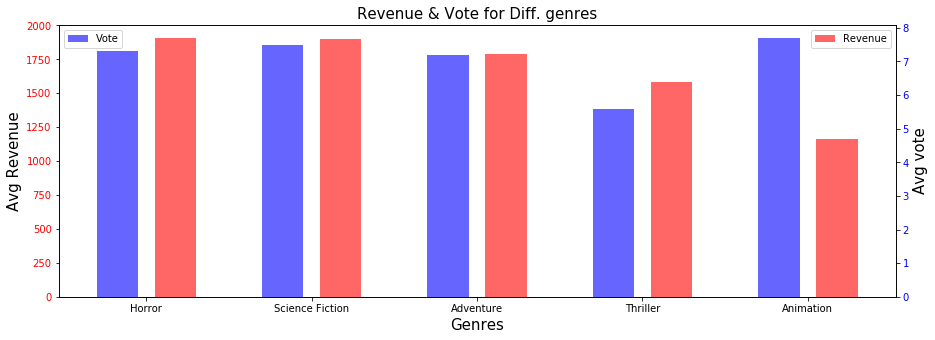

In [253]:
#visualizing the trend for Top 5 genres with respect to Revenue and Vote count
x=np.arange(len(df_gen_s.head(5)))
width=0.35
labels=['Horror','Science Fiction','Adventure','Thriller','Animation']#listing out top five genres

fig,ax1=plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()

ax1.bar(x+width/2,df_gen_s['revenue_adj'].head(5),color='r',alpha=0.6,width=0.25,label='Revenue')
ax2.bar(x-width/2,df_gen_s['vote_average'].head(5),color='b',alpha=0.6,width=0.25,label='Vote')
ax1.set_ylabel('Avg Revenue',fontdict={'size':15})
ax1.set_xlabel('Genres',fontdict={'size':15})
ax1.set_title('Revenue & Vote for Diff. genres',fontdict={'size':15})
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.tick_params(axis='y', labelcolor='r')
ax1.legend(loc='upper right')

ax2.set_ylabel('Avg vote',fontdict={'size':15})  
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc='upper left')




<p> <b> This plot gives an idea of how the top 5 Genres have been accepted in terms of Vote avg and Revenue Average.</b> </p>

<a id='conclusions'></a>
## Conclusions



#### Summarizing my exploration on the research questions as listed below. I have done the exploration on this dataset to the best of my knowledge, however there can be several other factors or viewpoints that can still be explored which i may have missed. Hence this is just an self analysed exploration from my side.
<p> 
<ol>I have considered the following for my analysis:
    <li> Revenue as the dependent variable, column name- 'revenue_adj'.</li>
    <li> Popularity, Vote average, Released month, Genres, Production companies as the independent variables. </li>
    </ol>
</p>

### 1. Is Higher budget associated with higher revenues? 


<ol>
    <li>The average revenue of <b> 121.65 </b> has exceeded the average budget of <b> 40.08 </b> along the years, showing that there may have been no deficits.</li>
<li>However the from year 1985 the ratio between average revenue to average Budget has significantly decreased to <b>3.46</b> when compared to the ratio years before 1985 to <b> 3.46 </b> </li>
<li>Apart from the couple of outliers, higher budget movies have generally resulted in higher revenue, with the average budget of <b> 115.2 million USD</b> and average revenue of <b> 341.8 million USD </b>.</li>
    <li>From the distribution plots it can be said that both the parameters are <b> right skewed </b>, with Revenue understandably having a larger spread.</li>
    
    

### 2. What are the characteristics of a production company leading to higher revenue ?

<ol>
<li>The Top 5 highest revenue generating production company are the likes of <b> Twentieth Century Fox,
Warner Bros,Universal pictures,Walt Disney, Paramount pictures </b>.</li>
<li>All these high revenue production companies have been associated with a cast heavy plots like <b> Kate Winslet, Leonardo DiCaprio, Sam Worthington, Chris Evans </b> etc, among which most of the films belonged to Science fiction/Fantasy and thriller with ideal run time <b> 120-140 minutes </b>.(refer below plot) </li>
<li> This shows that the audience might prefer watching more of the above mentioned genres with a complete story probably involving previous story plots like the one from Marvel studios </li>    
</ol>    

Text(0.5,1,'Runtime distribution for top 50 films')

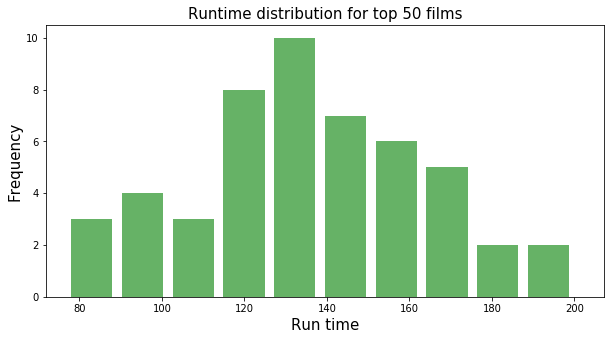

In [254]:
plt.figure(figsize=(10,5))
plt.hist(prod_rev['runtime'][:50],color='g',alpha=0.6,width=10)
plt.xlabel('Run time',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Runtime distribution for top 50 films',fontsize=15)

### 3. Does Higher popularity increase vote counts, thereby having an effect on revenue of the film?

<ol>
    <li> Suprisingly the<b>  revenue generated </b> was the highest for the films which had <b> lesser popularity </b> (probably mostly before the release) and movies like Guardians of Galaxy, Interstellar and Mad max fury which had good popularity failed to fair well in the box office.</li>
    <li> It is also notable to say that the <b> popularity is inversely linked to average votes </b> which gives a fair indication of the audience acceptance of the movies, resulting in Higher revenues.
</li>
</ol>

### 4. Does Seasonal releases impact the revenue generation of a movie?

<ol>
    <li> <b> Months of May,June and July </b> have resulted in <b> higher revenues </b> for movies being the holiday season for most of the countries and hence the number reflect on the same (Average of 167 Millon USD for May- July and 117 Million USD for August to October ). </li>
<li> Interestingly the  <b> Number of releases have come down during these months May,June and July </b> and <b> it has increased between August to October </b> may be because of the local holiday season in the US or in Europe. However the revenue shows a contradictory to this figures as the movies haven’t done well in the box office released during this period (August to October).</li>
    

### 5. What factors are associated with the failure of a film?

<ol>
<li>The films which have which haven’t fared well in the box office has been largely associated with the <b> Popularity index with mean of just 0.69 as opposed to 1.71 with the movies generated higher revenue </b>.</li>
<li>Also the budget invested for the films have been on the lower end with <b> 23.3 millions USD as opposed to 66.5 million USD for higher revenue films. </b> </li>
<li> The runtime has also played its part with average runtime of <b> 105 minutes as opposed to 113 minutes </b> for higher revenue films, this may mean that the story plot did not have a complete cycle (a rough guess).</li>
</ol>    

### 6. What genres are most accepted?

<p> Going by the data set, I have summed up on the top 5 genres with Visualization. It turned out <b>Horror, Science Fiction, Adventure, Thriller and Animation </b> are the most accepted genres by the audience with respect to <b> Average revenue and Avg vote count </b> counts.</p>

### 7. Which film was the most successful and which performed the worst in the 21st century? (2000-2015)

In [255]:
df_21=df[df['release_year']>=2000]

In [256]:
df_21.sort_values(by=['revenue_adj'],ascending=False).head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,241.0,2828.0,Dec


In [257]:
df_21.sort_values(by=['revenue_adj'],ascending=False).tail(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,month
2083,0.602854,12000000,204940,Henry's Crime,Keanu Reeves|Vera Farmiga|James Caan|Judy Gree...,Malcolm Venville,108,Action|Comedy|Thriller,Company Films|Moving Pictures Film and Television,2010-01-14,49,5.8,2010,12.0,1.0,Jan


<p> The performed Movie in terms of Revenue was <b> Avatar with  2828 million USD </b> and worst performed movie was <b> Henry's Crime with 1 Million USD </b> revenue.</p>

<p> Overall the data set provides some information on performances of movies, there are few more informations like the Critics rating, Viewers rating, Storyline rating, Cast rating etc could have helped in more accurate findings </p>

Resources Referred:
1. Udacity Module.
2. matplotlib.org for Matplotlib plots.
3. pandas.pydata.org for Pandas operations.